In [1]:
# 标准库
import time
from math import sqrt
import os
import joblib
# 第三方库
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from IPython.display import display

#三大类别数据回归算法
from xgboost import XGBRegressor

# Scikit-learn 库
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFECV
from sklearn.linear_model import BayesianRidge, ElasticNet, LinearRegression, Ridge, RidgeCV, SGDRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import Binarizer, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

sns.set(font='serif', style='ticks')
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.sans-serif']=['Arial Unicode MS']

plt.rcParams['axes.unicode_minus']=False
pd.set_option('display.max_columns',None)

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D,MaxPooling1D, MaxPooling2D,GlobalAveragePooling1D,Flatten, Dense

In [2]:
import pandas as pd

# 读取文件
data = pd.read_csv('./Vm.csv')
X = data[['PSI', 'DELTA']]
Y = data[['n', 'k']]

In [3]:
transfer1 = StandardScaler()
X = transfer1.fit_transform(X)

transfer2 = StandardScaler()
Y = transfer2.fit_transform(Y)

In [4]:
samples_per_slice = 701
n_samples = X.shape[0] // samples_per_slice
feature_slices_X = X[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 2))
x = np.stack(feature_slices_X, axis=0)
print(x.shape)  # (110, 701, 2)

(606, 701, 2)


In [5]:
samples_per_slice = 701
n_samples = Y.shape[0] // samples_per_slice
feature_slices_Y = Y[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 2))
y = np.stack(feature_slices_Y, axis=0)
print(y.shape)  # (110, 701, 2)

(606, 701, 2)


In [6]:
# 通过切片获取每个样本的前100个值
x100 = x[:, :200, :]

print(x100.shape)  # 应该输出: (606, 100, 2)

(606, 200, 2)


In [7]:
x_train, x_test, y_train, y_test =train_test_split(x100, y, test_size=0.2, random_state=24,shuffle=True)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Reshape, Dropout
from tensorflow.keras.optimizers import Adam, Adamax, Nadam
from tensorflow.keras.regularizers import l2

# 设定L2正则化参数，0.01是正则化强度lambda
l2_reg = l2(1.6714630246933165e-24)

model = Sequential()

model.add(Conv1D(filters=256, kernel_size=3, activation='leaky_relu', input_shape=(200, 2), kernel_regularizer=l2_reg))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='leaky_relu', kernel_regularizer=l2_reg))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='leaky_relu', kernel_regularizer=l2_reg))
model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(0.21836539855108517))
model.add(Flatten())

# 通过添加另一个Dense层，然后使用Reshape层调整形状为(701, 2)
model.add(Dense(701 * 2))
model.add(Reshape((701, 2)))

# 输出模型结构
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 198, 256)          1792      
                                                                 
 max_pooling1d (MaxPooling1  (None, 99, 256)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 97, 32)            24608     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 48, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 46, 32)            3104      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 23, 32)           

In [12]:
callbacks = [EarlyStopping(monitor='val_loss', patience=42, verbose=1, min_delta=0.00001)]

In [13]:
# 编译模型，使用MSE损失函数和SGD优化器
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.021628665031484796))

# 训练模型，假设训练数据为X_train和y_train
history = model.fit(x_train, y_train, callbacks=callbacks,epochs=1000, batch_size=256, validation_split=0.29440106979840375)

Epoch 1/1000

2/2 [==============================] - 2s 439ms/step - loss: 1.5284 - val_loss: 53.4113
Epoch 2/1000
2/2 [==============================] - 0s 115ms/step - loss: 42.3668 - val_loss: 0.7135
Epoch 3/1000
2/2 [==============================] - 0s 113ms/step - loss: 0.8284 - val_loss: 12.1171
Epoch 4/1000
2/2 [==============================] - 0s 97ms/step - loss: 11.6250 - val_loss: 4.3200
Epoch 5/1000
2/2 [==============================] - 0s 96ms/step - loss: 7.0714 - val_loss: 1.0653
Epoch 6/1000
2/2 [==============================] - 0s 115ms/step - loss: 2.2559 - val_loss: 1.3669
Epoch 7/1000
2/2 [==============================] - 0s 104ms/step - loss: 2.1323 - val_loss: 3.1112
Epoch 8/1000
2/2 [==============================] - 0s 123ms/step - loss: 2.8322 - val_loss: 2.3596
Epoch 9/1000
2/2 [==============================] - 0s 119ms/step - loss: 2.4322 - val_loss: 1.9300
Epoch 10/1000
2/2 [==============================] - 0s 109ms/step - loss: 1.8631 - val_loss: 0.8

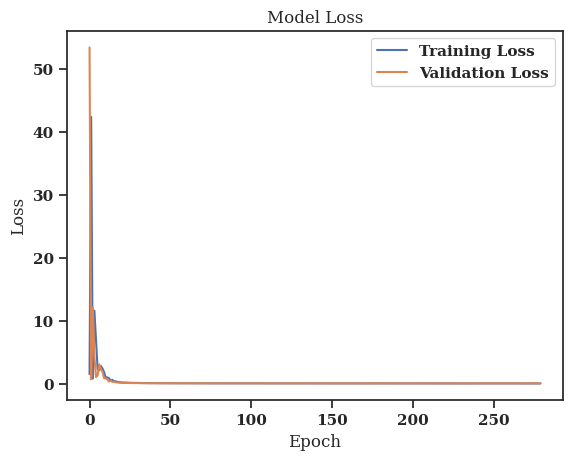

In [14]:
#绘制训练集和验证集的损失曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [25]:
y_pred = model.predict(x_test)
y_pred_reshaped = y_pred.reshape(-1, 2)
print(y_pred_reshaped.shape)

y_test_reshaped = y_test.reshape(-1, 2)
print(y_test_reshaped.shape)

4/4 [==============================] - 0s 8ms/step
(85522, 2)
(85522, 2)


In [26]:
# 通过inverse_transform方法将标准化后的输出还原为原始值
y_pred_reshaped = transfer2.inverse_transform(y_pred_reshaped)

# 同样，如果想要还原测试集中的真实值
y_test_reshaped = transfer2.inverse_transform(y_test_reshaped)

In [27]:
mse = mean_squared_error(y_test_reshaped, y_pred_reshaped)
r2 = r2_score(y_test_reshaped, y_pred_reshaped)
print("n_test MSE: ", mse)
print("n_test MSE: ", r2)

n_test MSE:  0.005608046510392768
n_test MSE:  0.9250883026422985


In [28]:
# 提取前701个的第一列和第二列
n_pred = y_pred_reshaped[:, 0]
n_test = y_test_reshaped[:, 0]
k_pred = y_pred_reshaped[:, 1]
k_test = y_test_reshaped[:, 1]

# 打印形状
print(n_pred.shape)  # 输出(122, 701)
print(n_test.shape)  # 输出(122, 701)
print(k_pred.shape)  # 输出(122, 701)
print(k_test.shape)  # 输出(122, 701)

(85522,)
(85522,)
(85522,)
(85522,)


In [30]:
mse = mean_squared_error(n_test, n_pred)
print("n_test MSE: ", mse)
rmse = np.sqrt(mse)
print("n_test RMSE: ", rmse)
mae = mean_absolute_error(n_test, n_pred)
print("n_test MAE: ", mae)
r2 = r2_score(n_test, n_pred)
print("n_test R2 score: ", r2)

n_test MSE:  0.009434909243623455
n_test RMSE:  0.09713346098859782
n_test MAE:  0.06873715449138937
n_test R2 score:  0.8614180345609792


In [31]:
mse = mean_squared_error(k_test, k_pred)
print("k_test MSE: ", mse)
rmse = np.sqrt(mse)
print("k_test RMSE: ", rmse)
mae = mean_absolute_error(k_test, k_pred)
print("k_test MAE: ", mae)
r2 = r2_score(k_test, k_pred)
print("k_test R2 score: ", r2)

k_test MSE:  0.0017448153453367182
k_test RMSE:  0.04177098688487882
k_test MAE:  0.022429627536728503
k_test R2 score:  0.9889880996242896


In [22]:
samples_per_slice = 701
n_samples = n_pred.shape[0] // samples_per_slice
feature_slices_pred = n_pred[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 1))
n_pred = np.stack(feature_slices_pred, axis=0)
print(n_pred.shape) 

samples_per_slice = 701
n_samples = n_test.shape[0] // samples_per_slice
feature_slices_test = n_test[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 1))
n_test = np.stack(feature_slices_test, axis=0)
print(n_test.shape)

samples_per_slice = 701
n_samples = k_pred.shape[0] // samples_per_slice
feature_slices_pred = k_pred[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 1))
k_pred = np.stack(feature_slices_pred, axis=0)
print(k_pred.shape) 

samples_per_slice = 701
n_samples = k_test.shape[0] // samples_per_slice
feature_slices_test = k_test[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 1))
k_test = np.stack(feature_slices_test, axis=0)
print(k_test.shape)

(122, 701, 1)
(122, 701, 1)
(122, 701, 1)
(122, 701, 1)


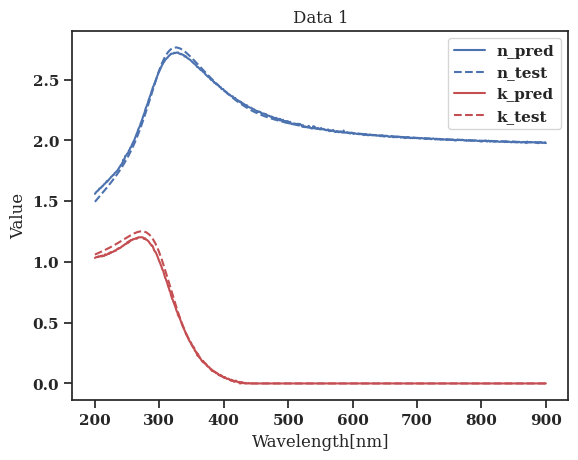

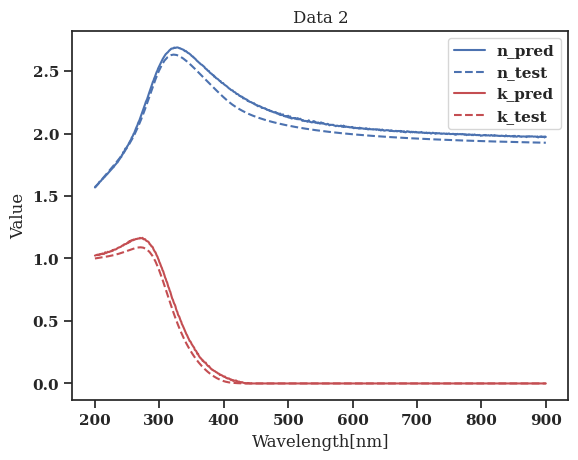

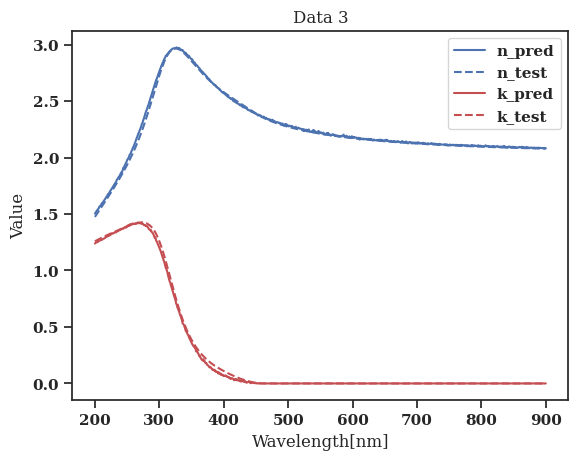

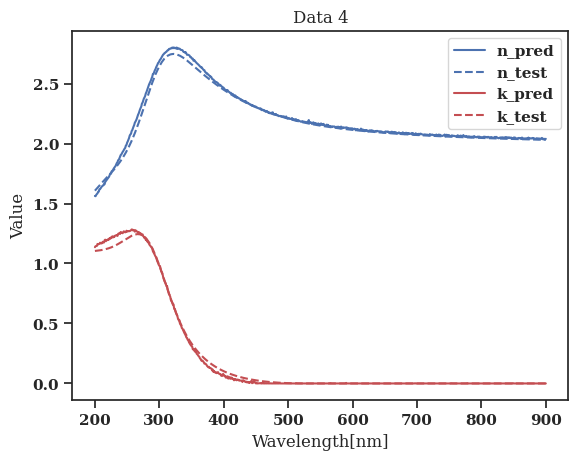

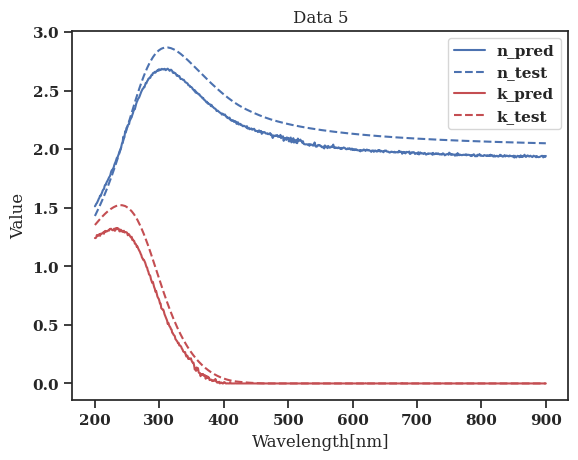

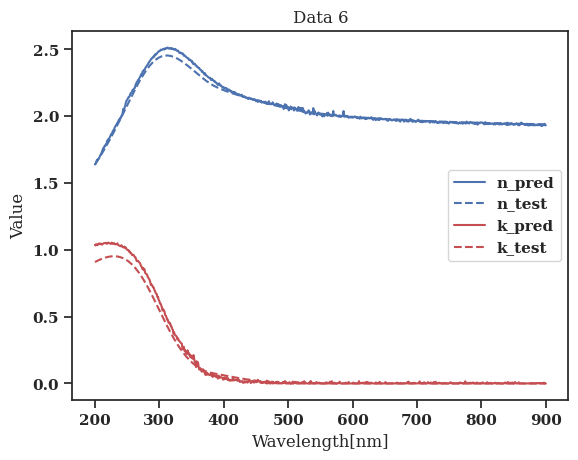

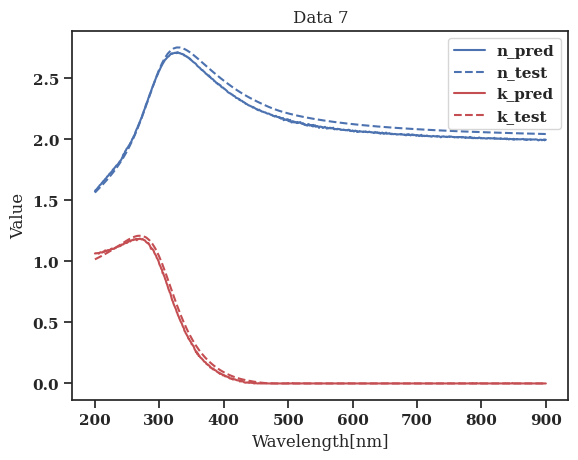

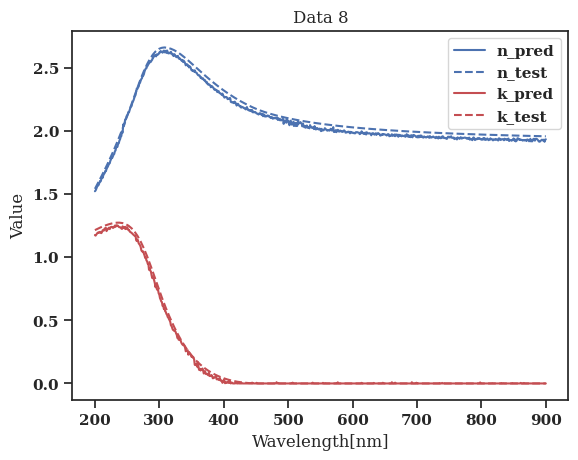

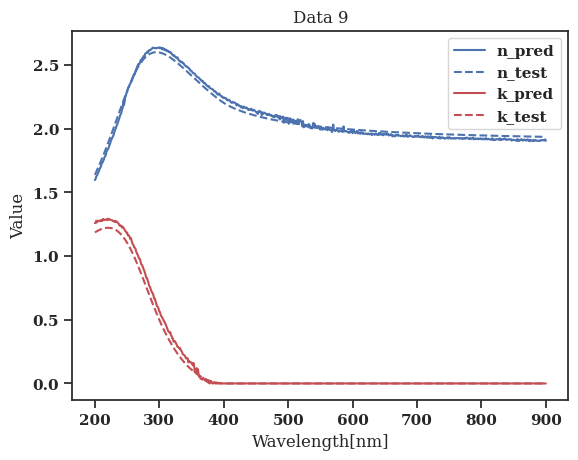

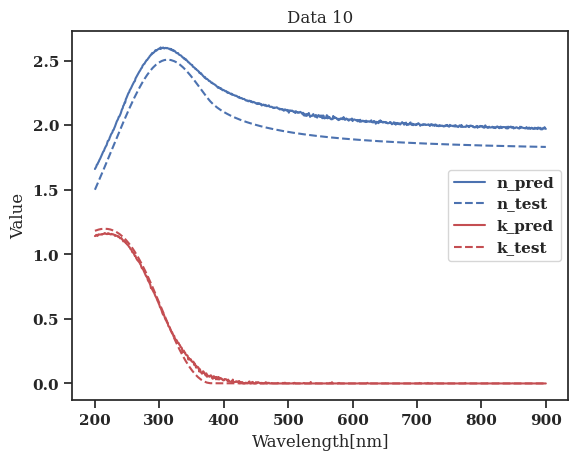

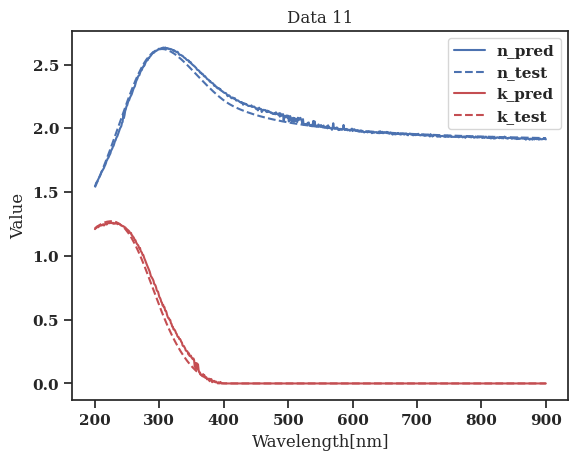

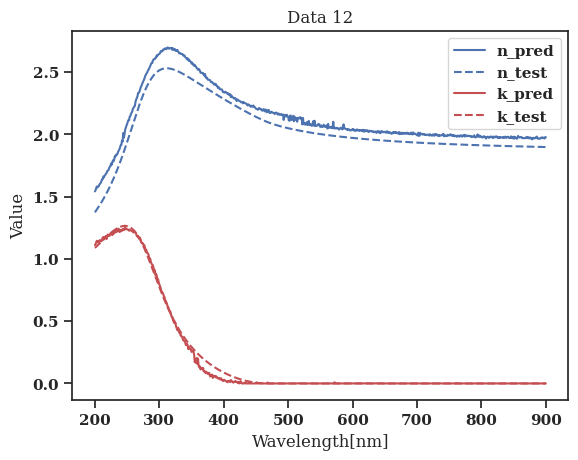

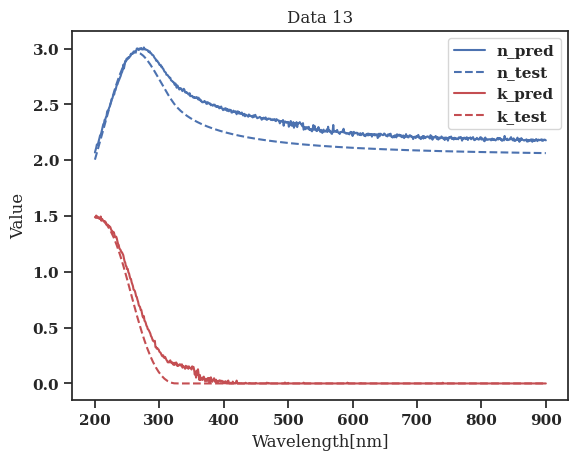

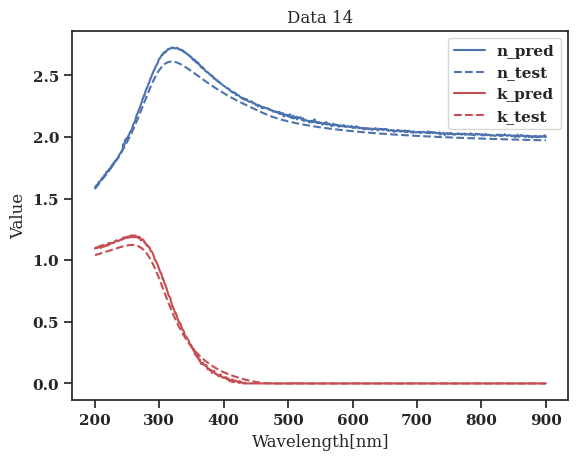

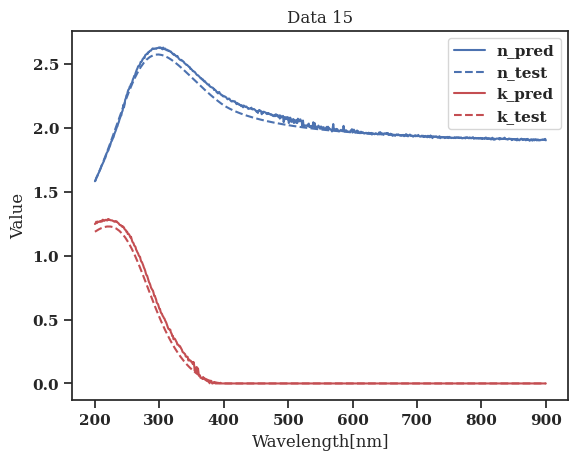

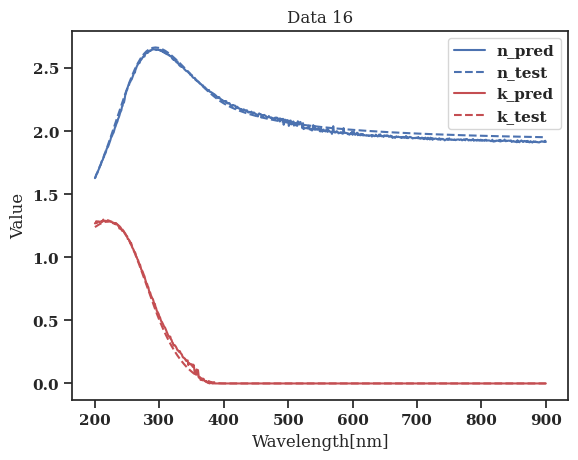

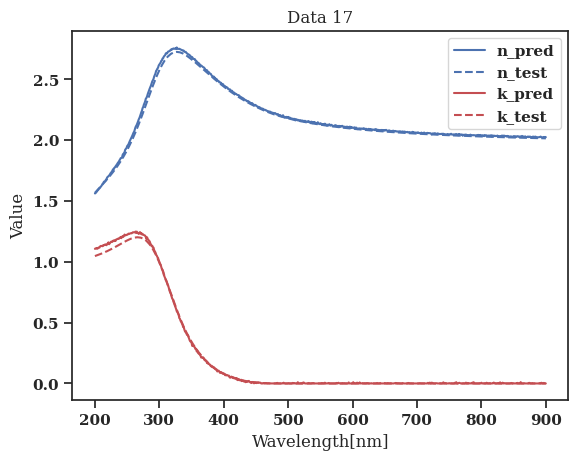

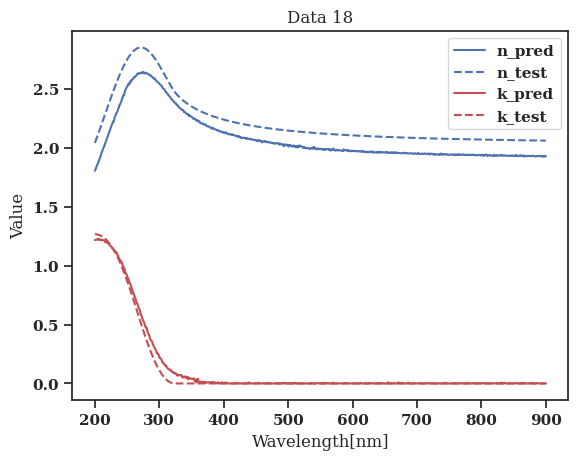

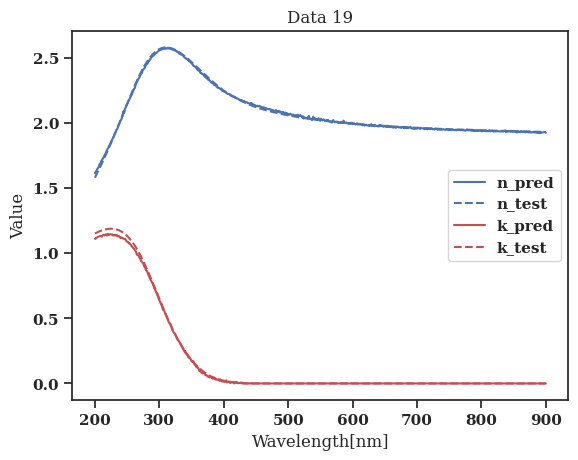

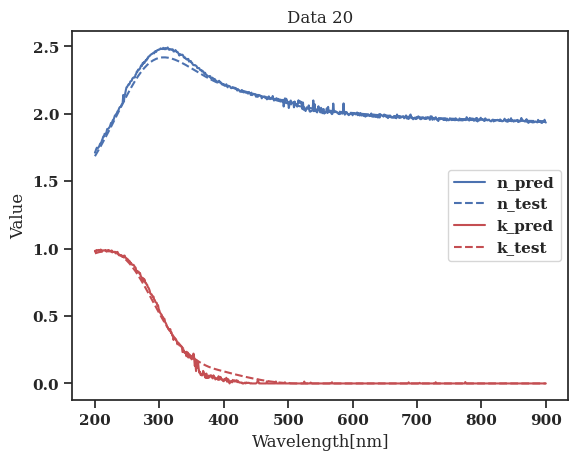

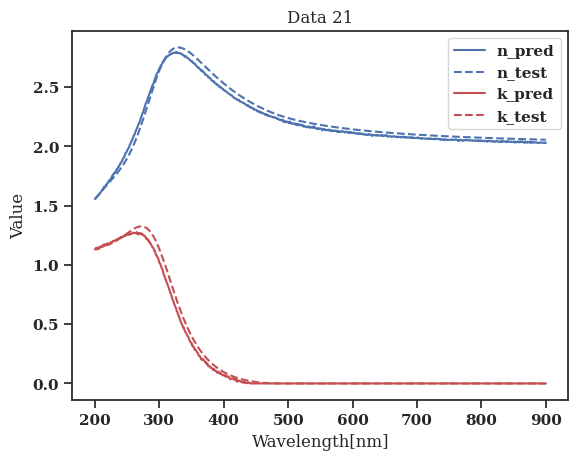

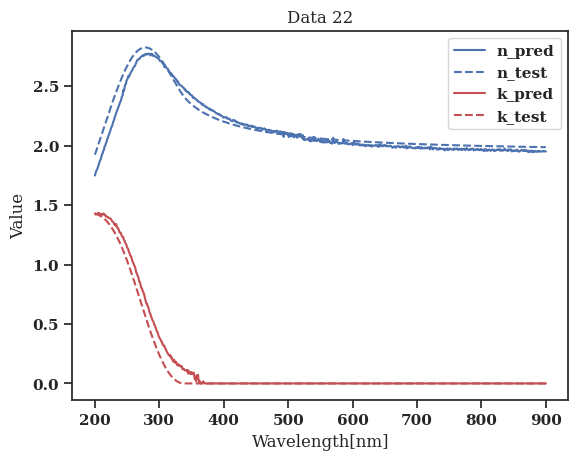

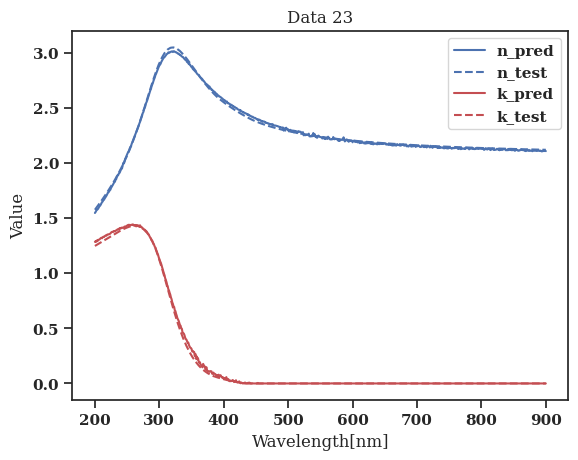

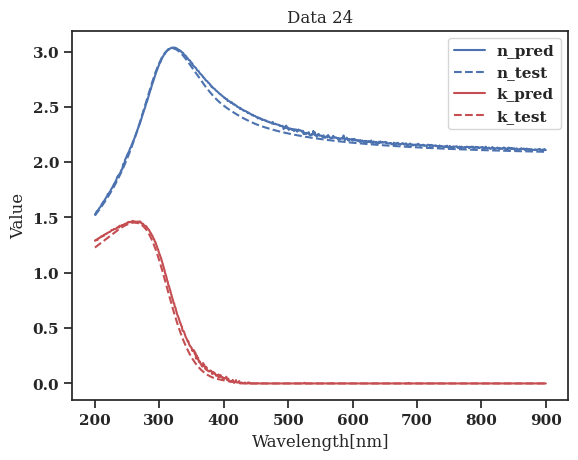

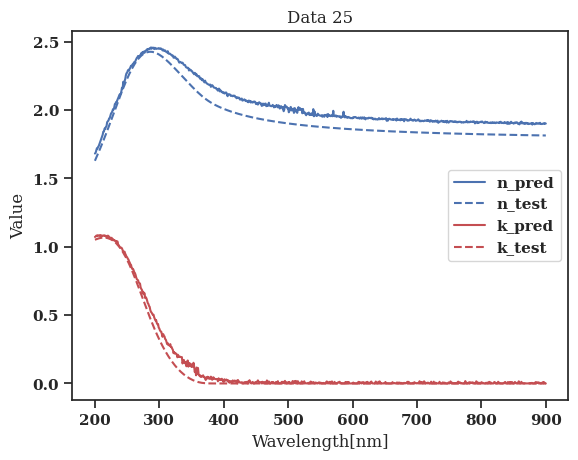

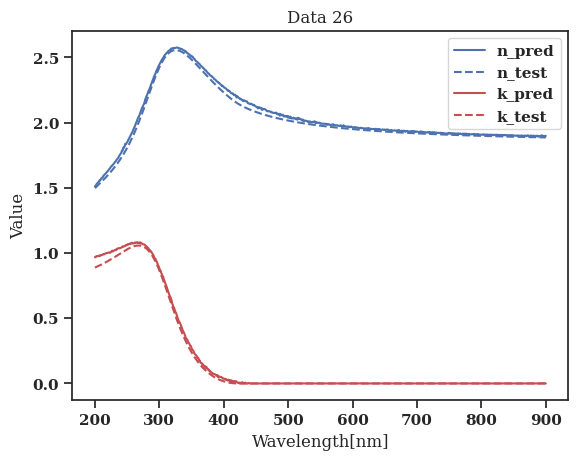

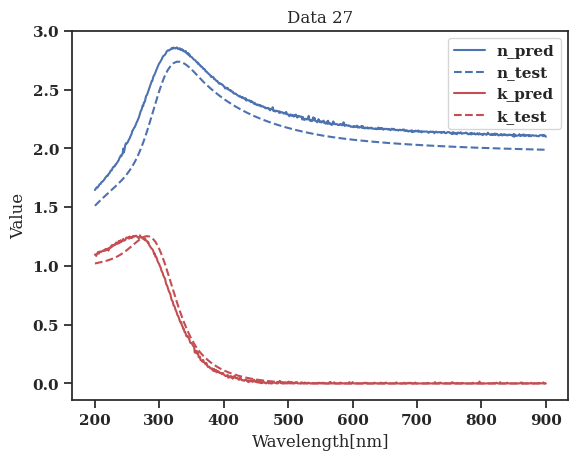

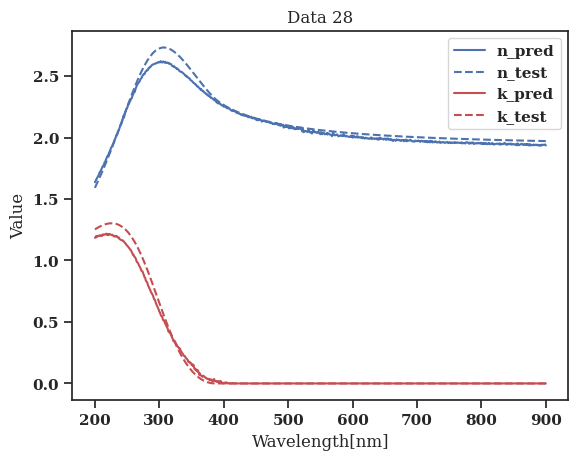

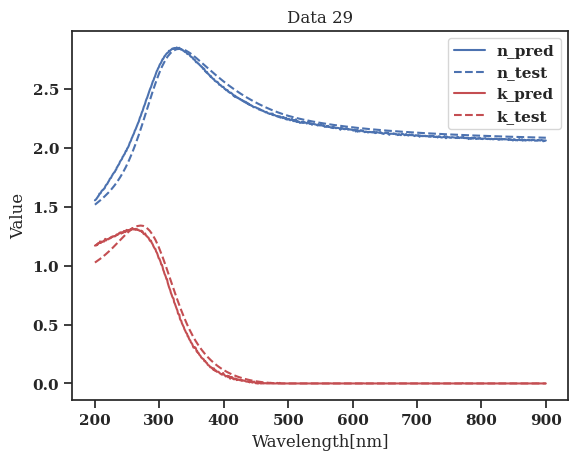

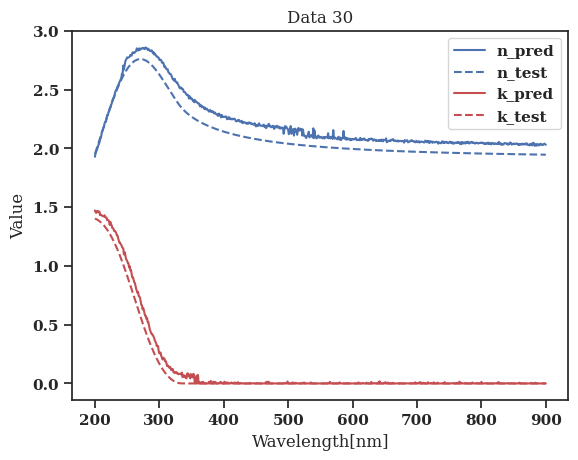

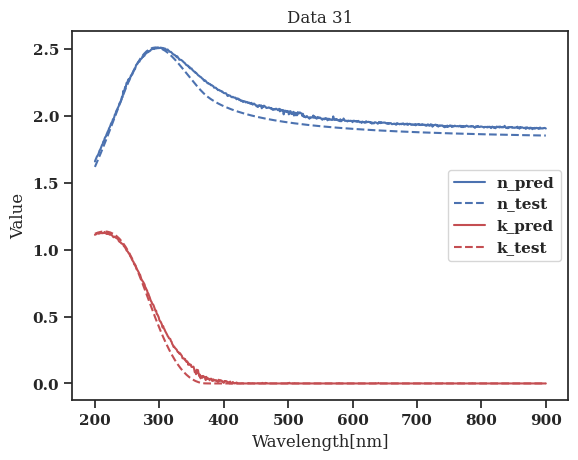

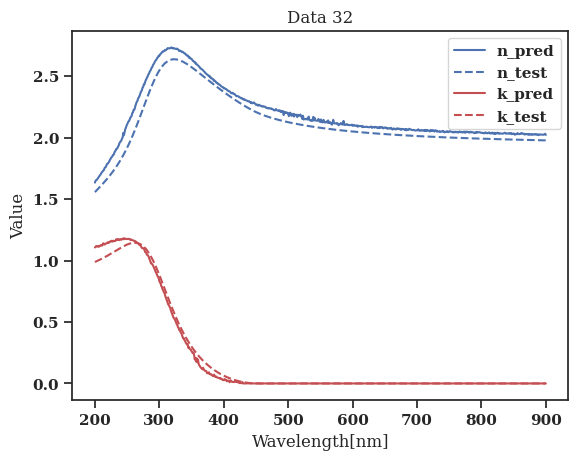

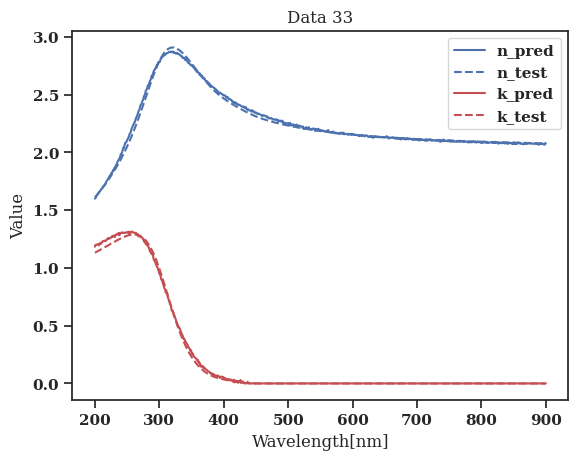

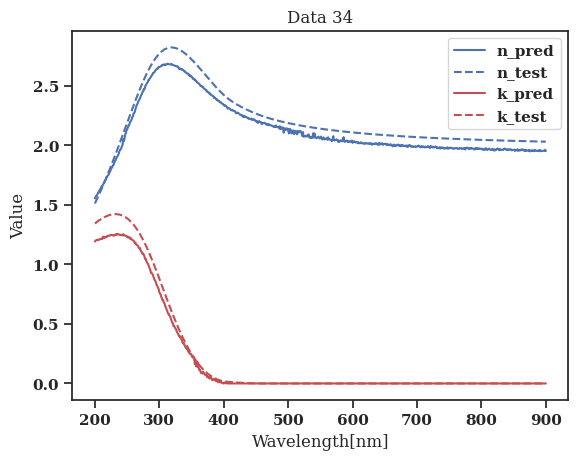

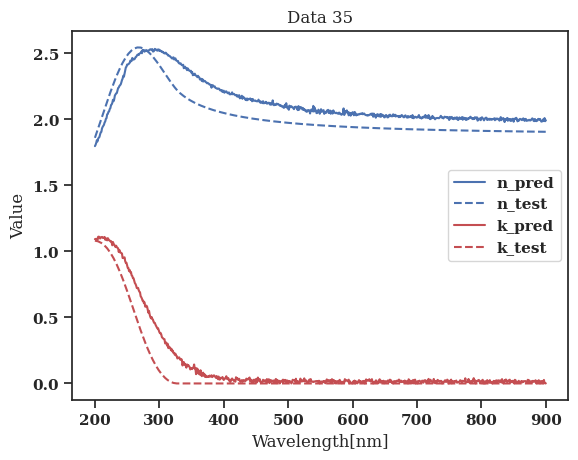

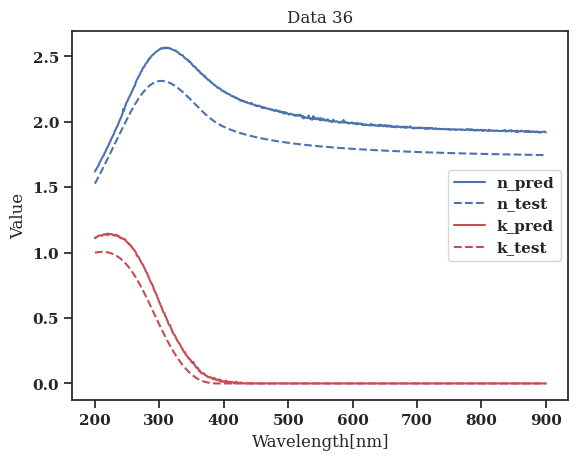

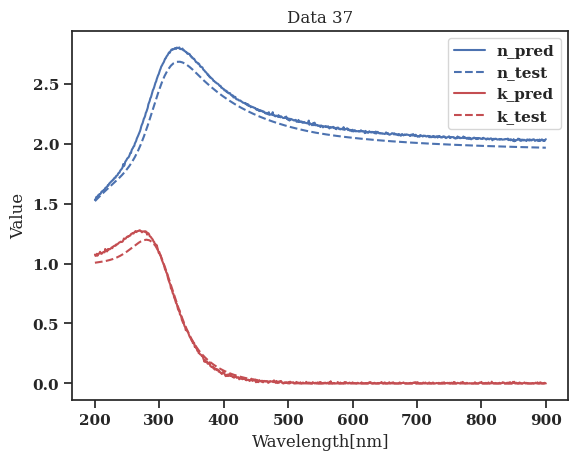

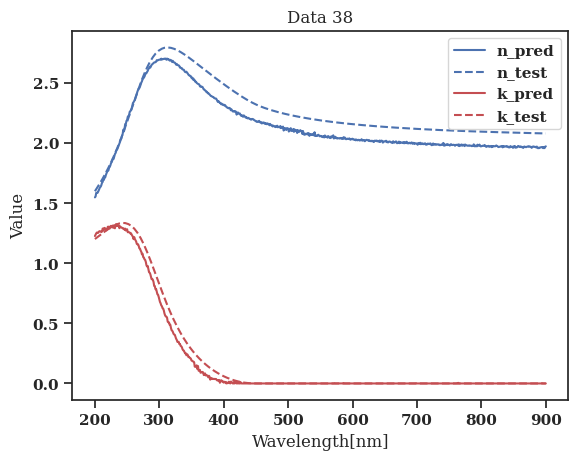

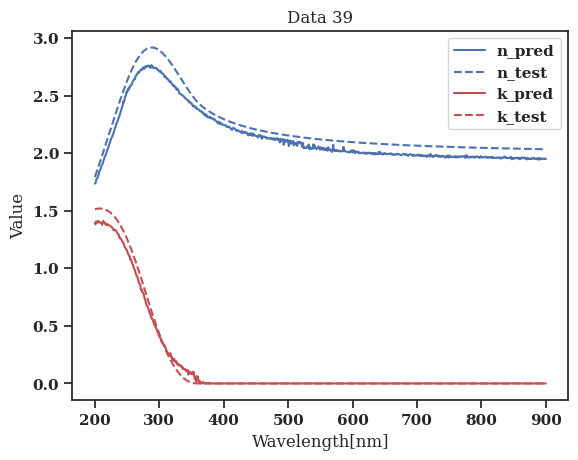

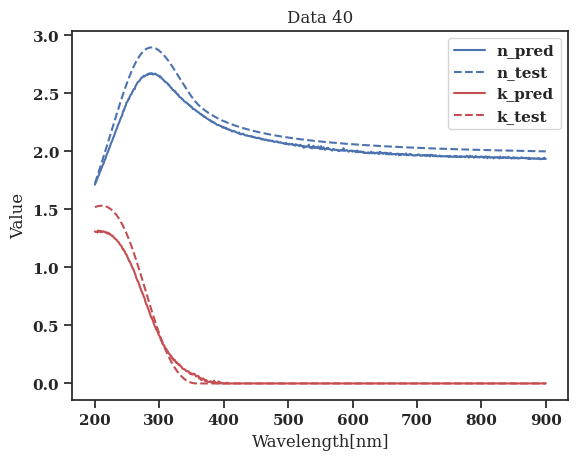

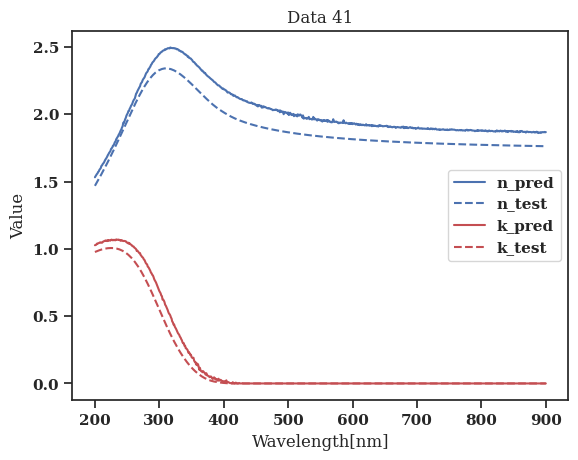

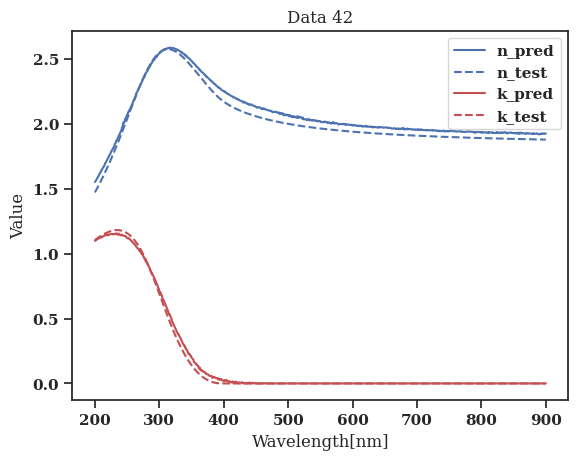

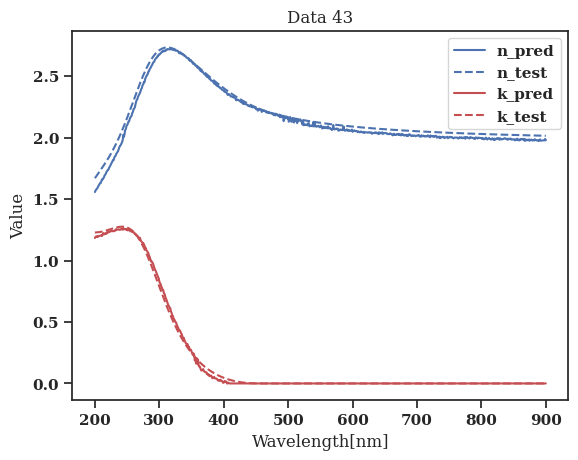

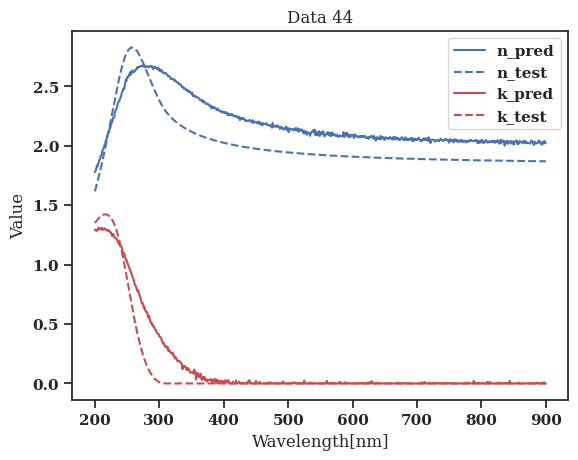

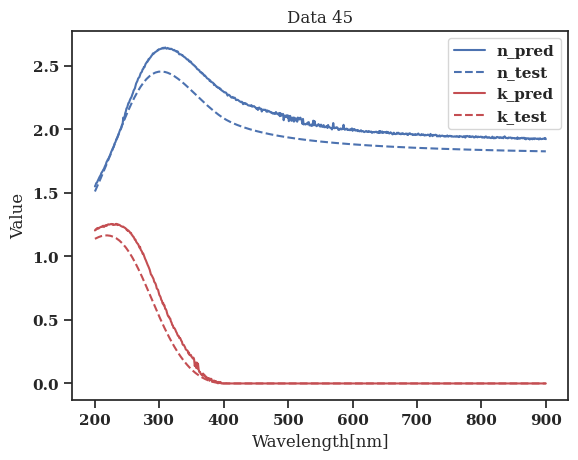

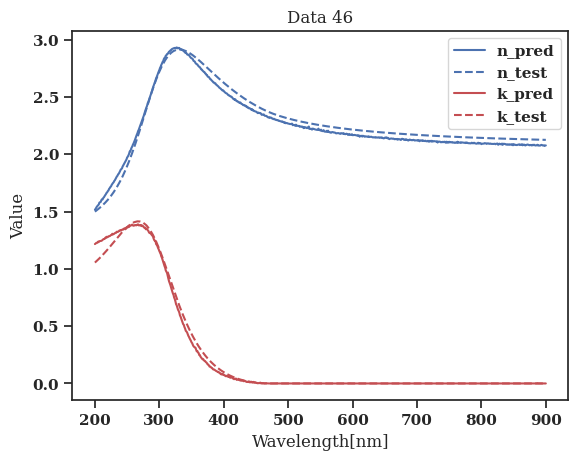

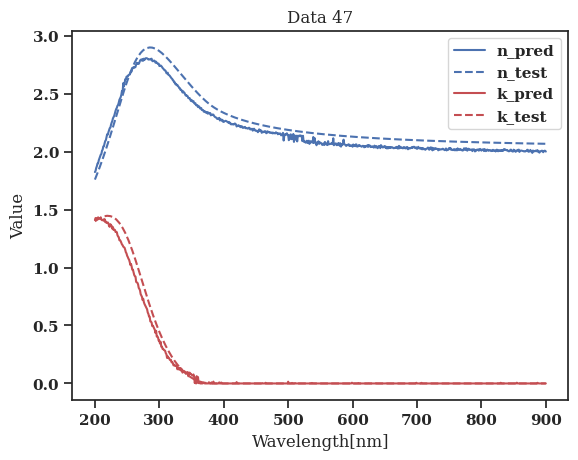

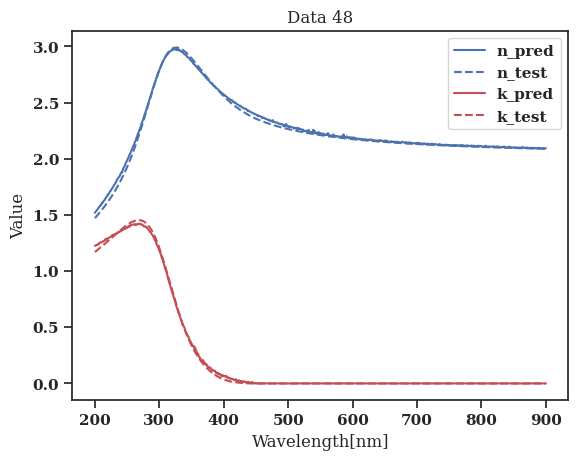

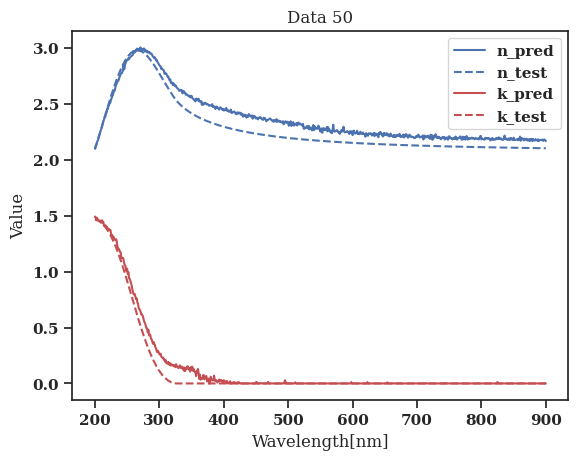

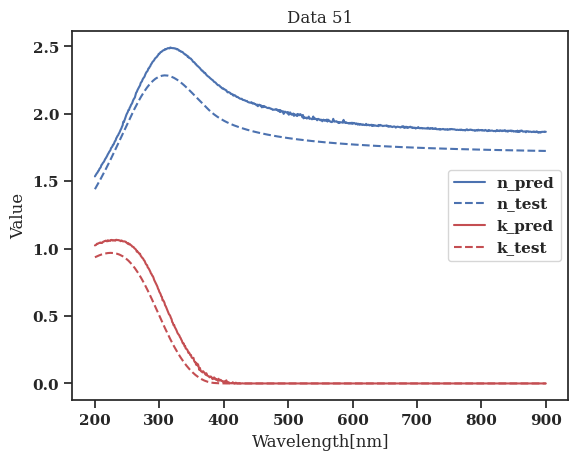

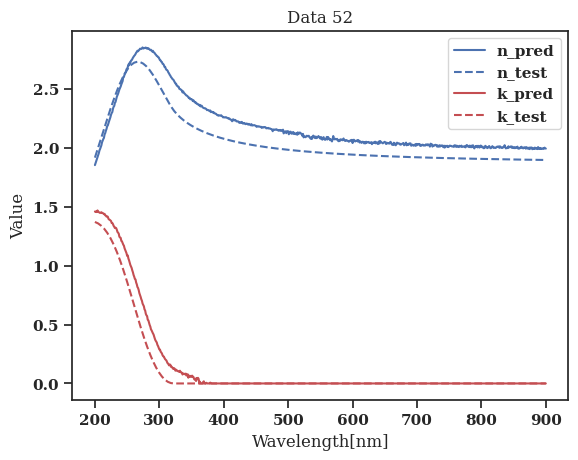

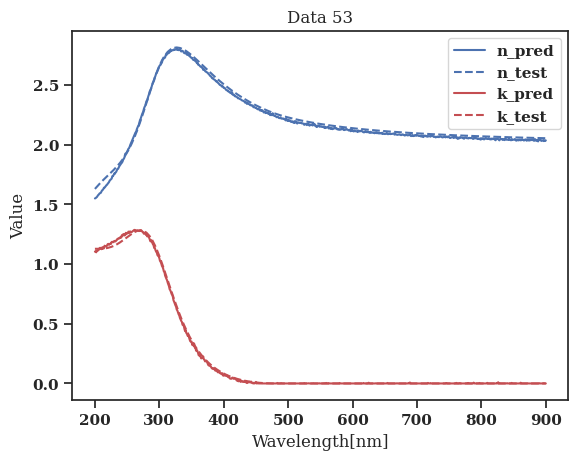

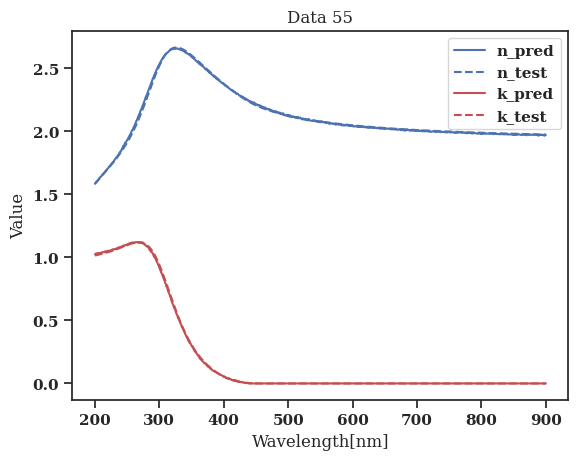

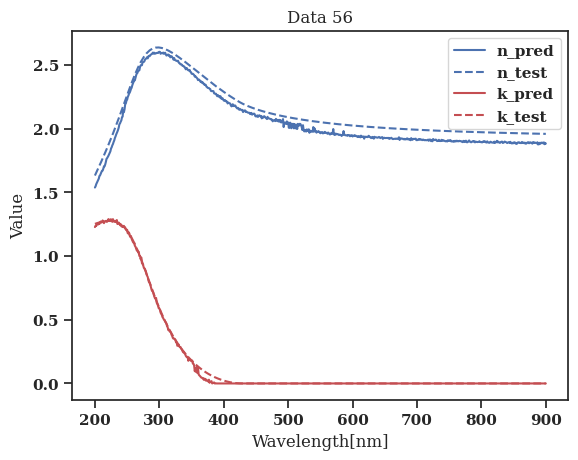

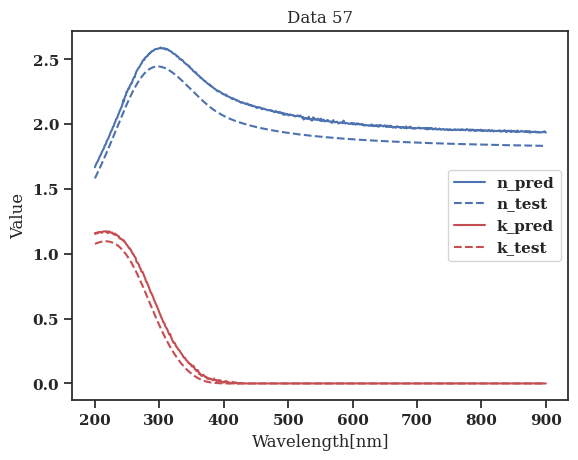

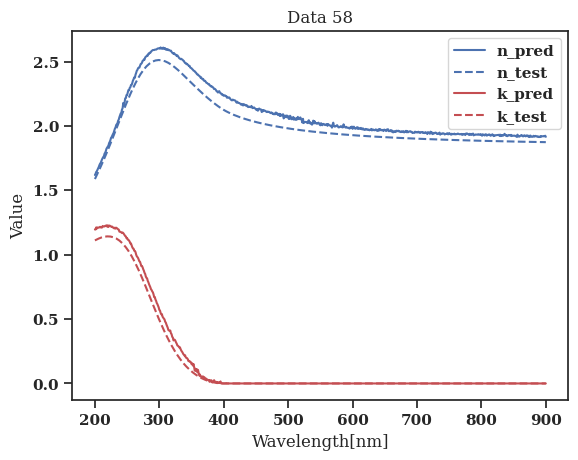

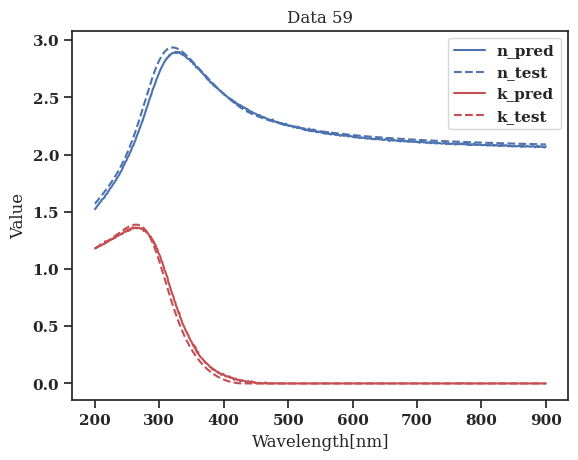

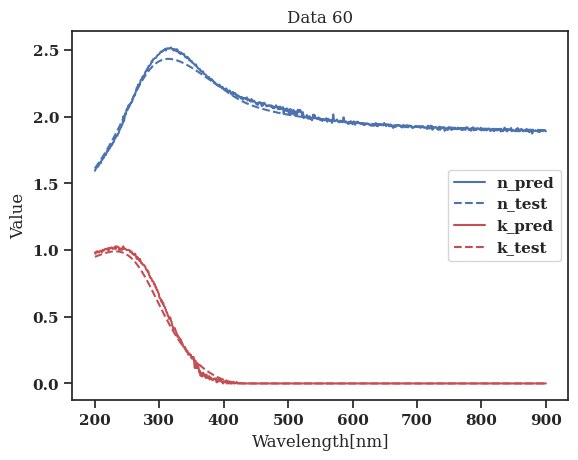

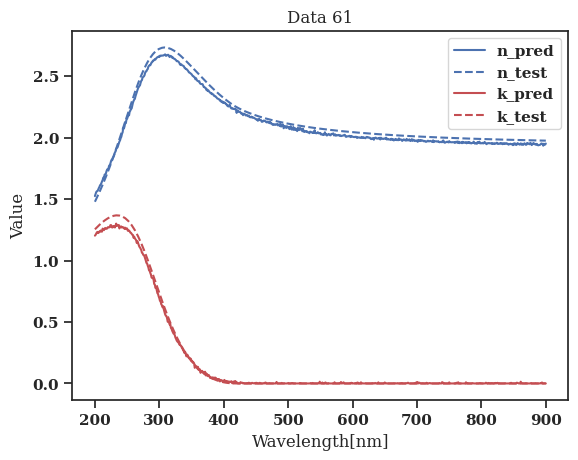

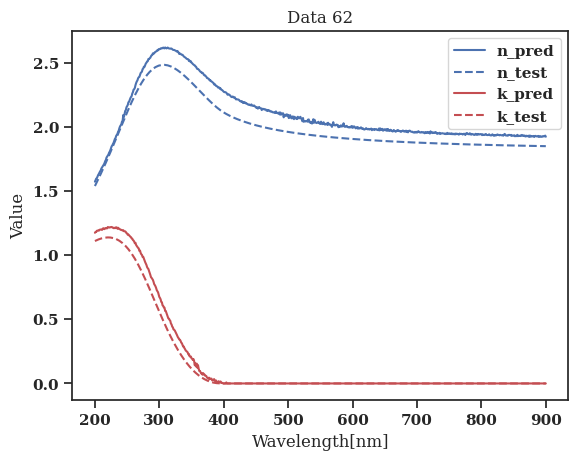

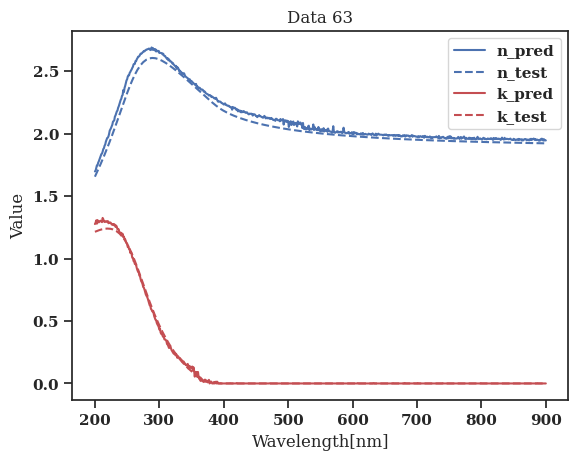

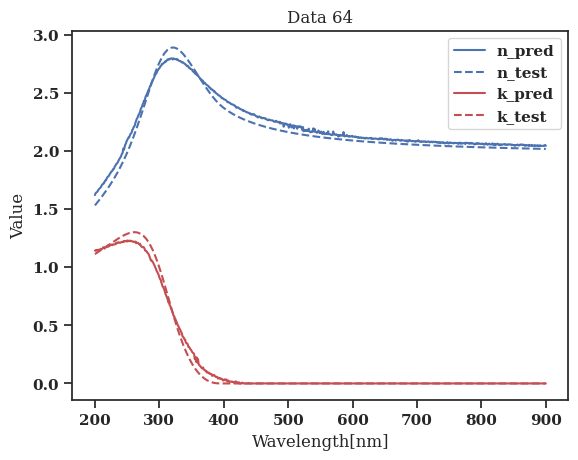

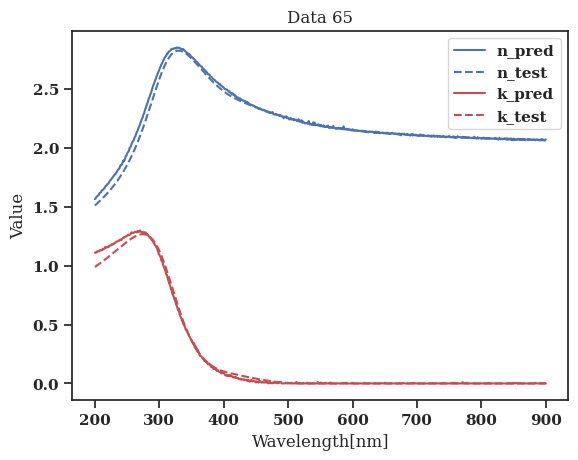

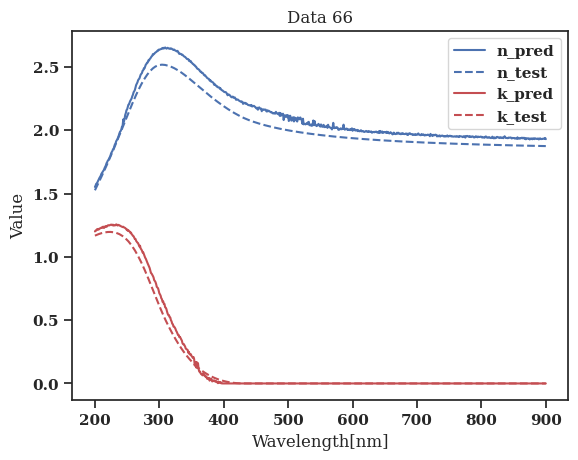

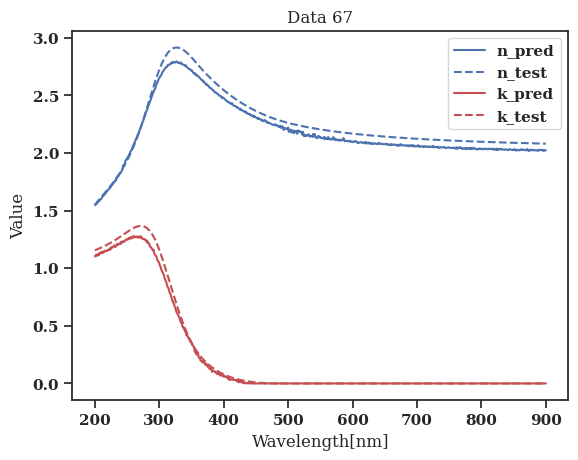

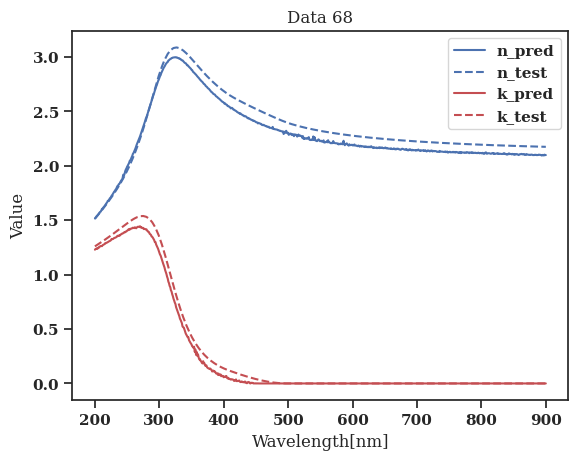

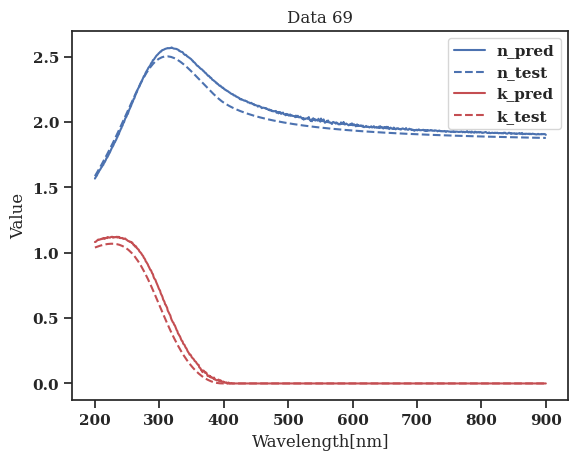

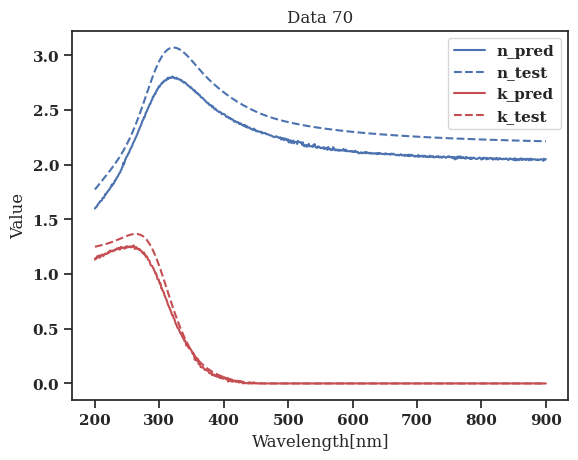

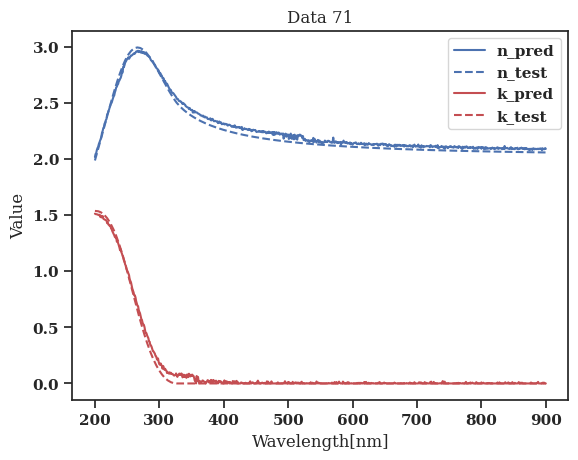

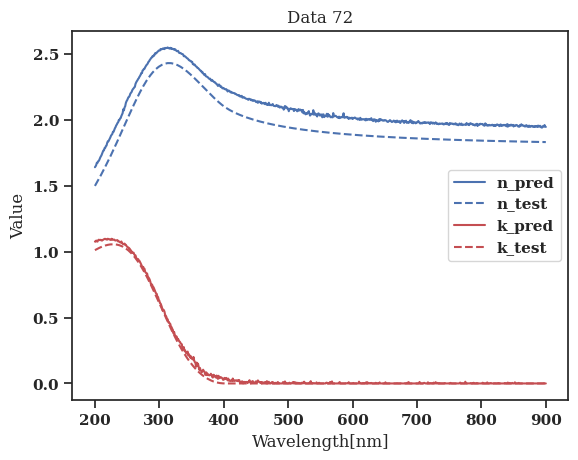

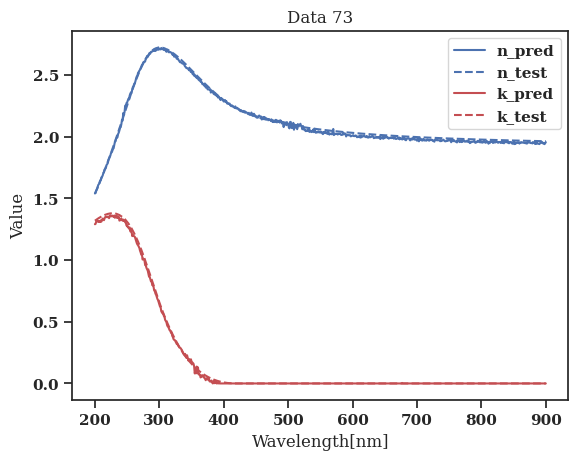

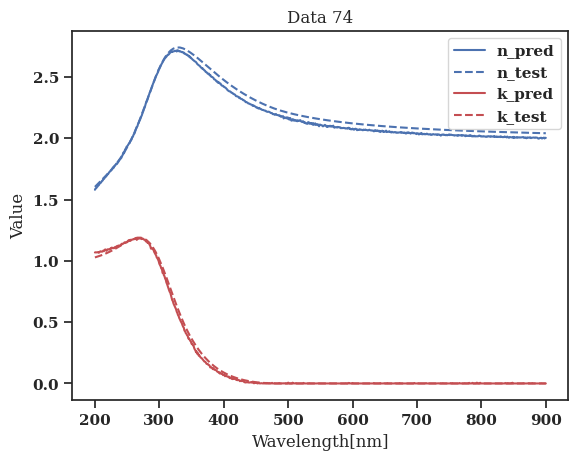

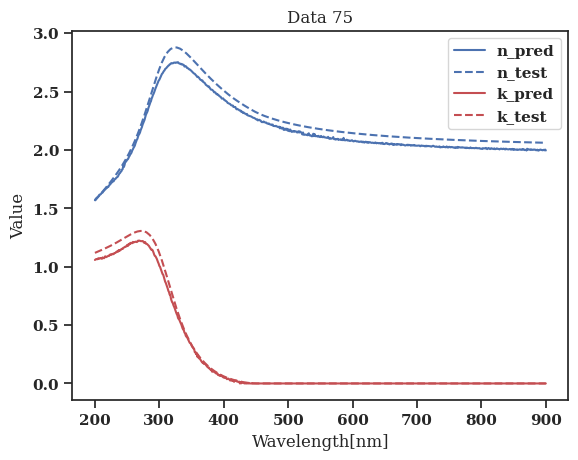

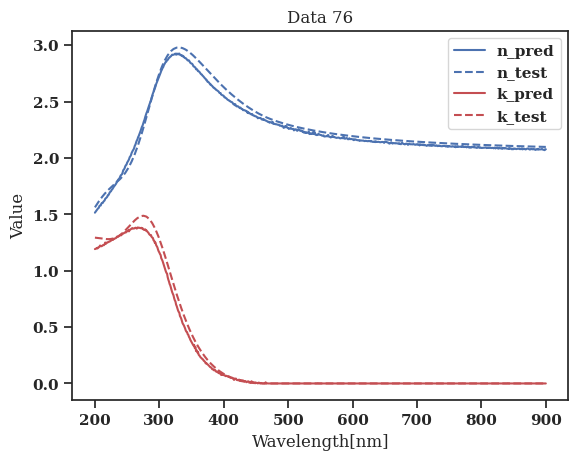

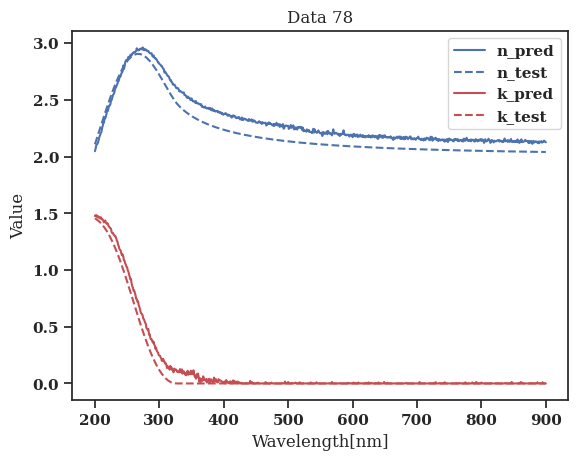

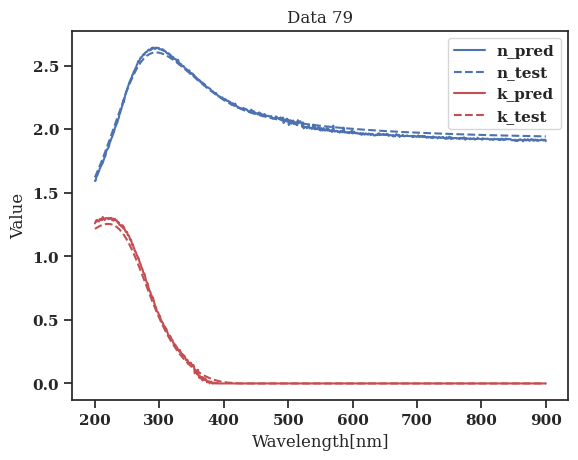

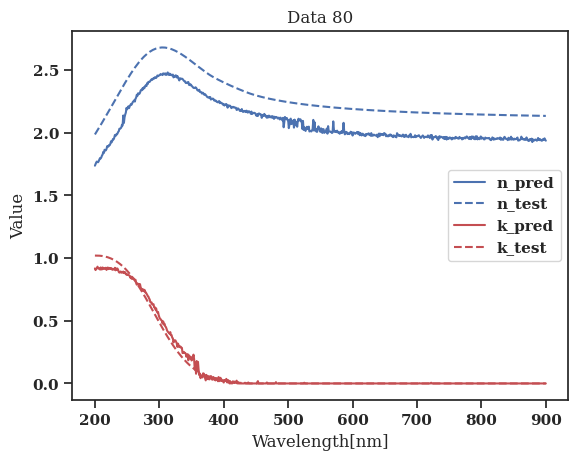

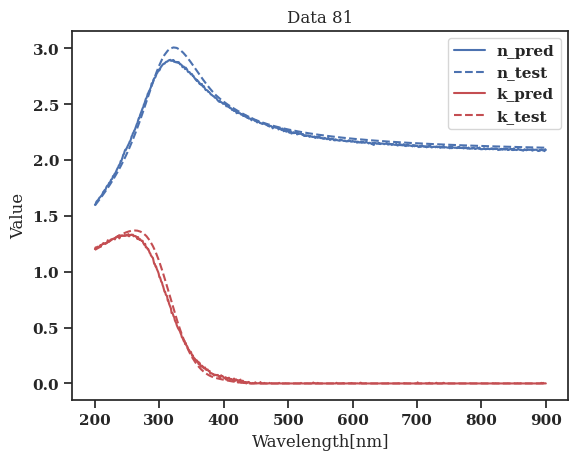

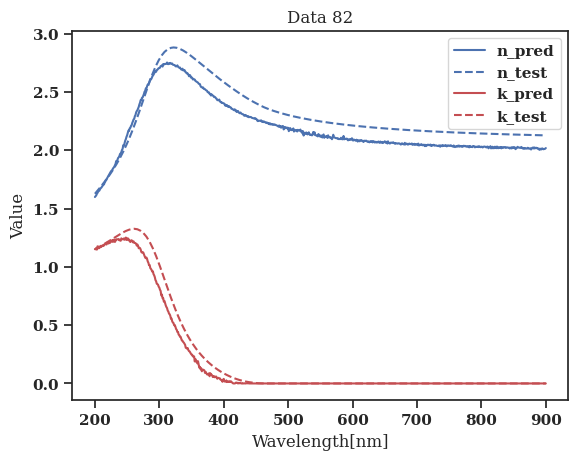

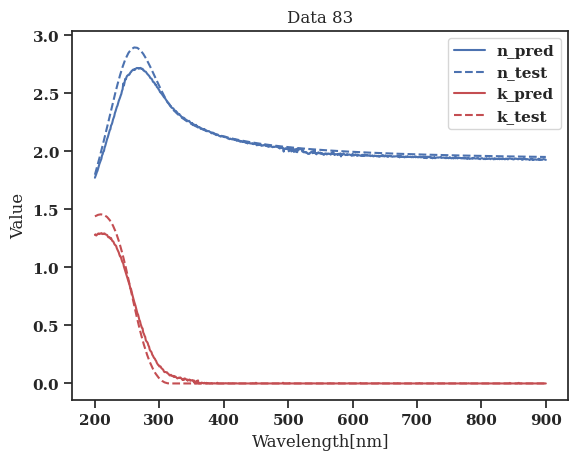

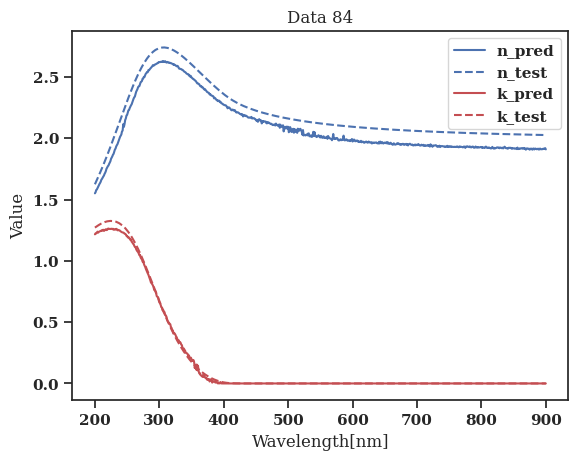

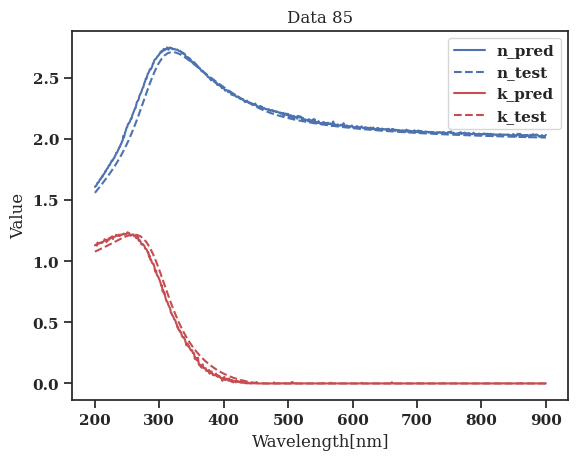

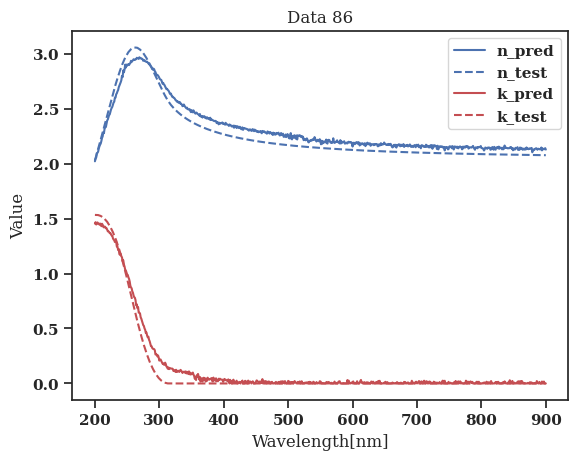

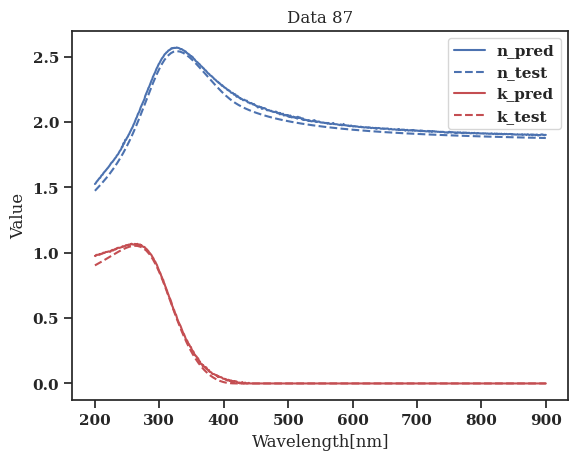

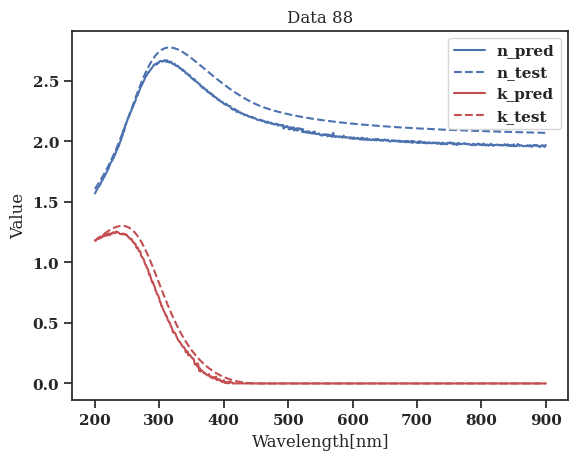

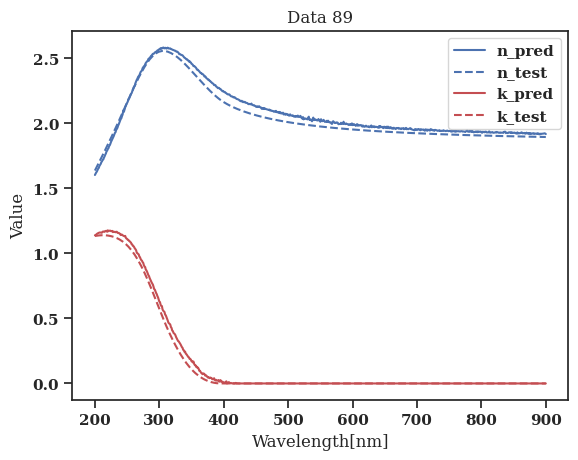

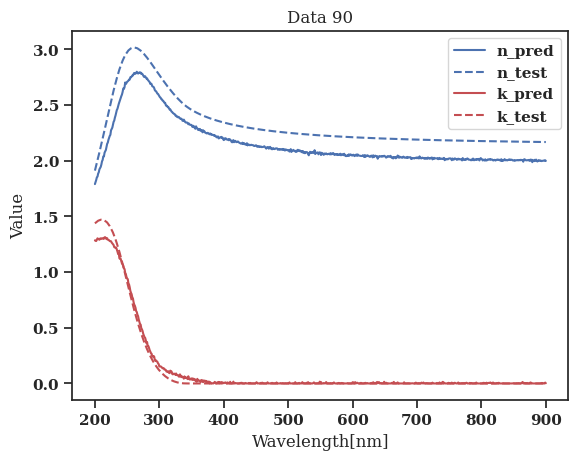

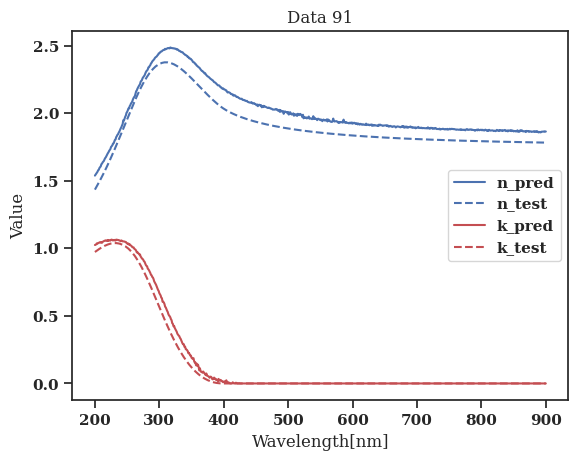

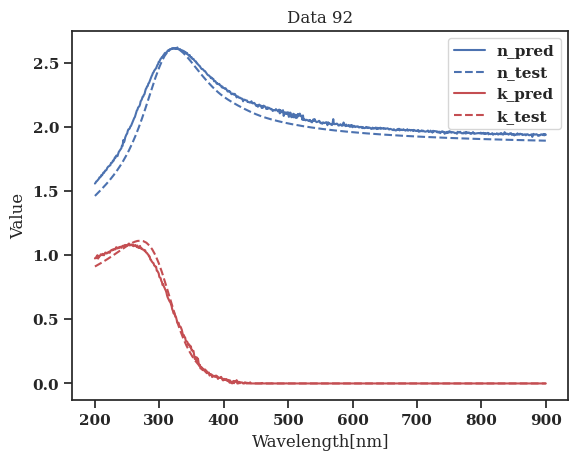

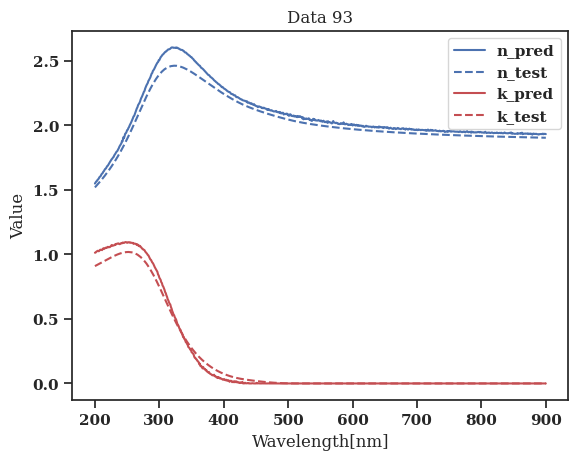

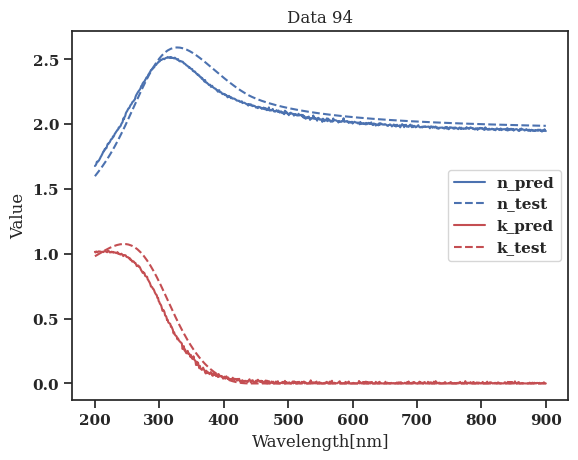

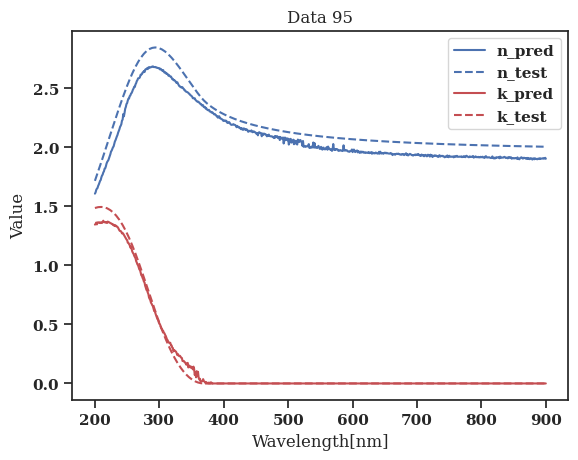

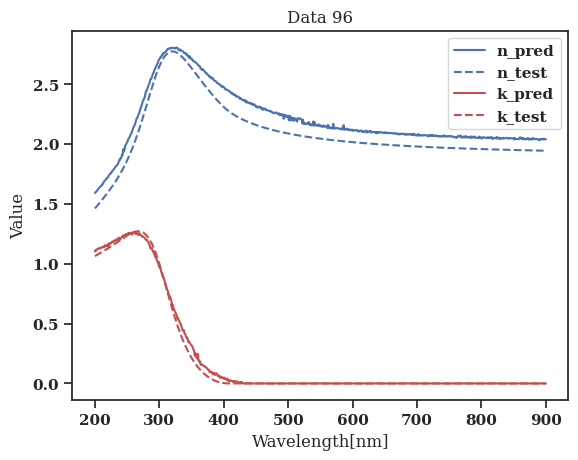

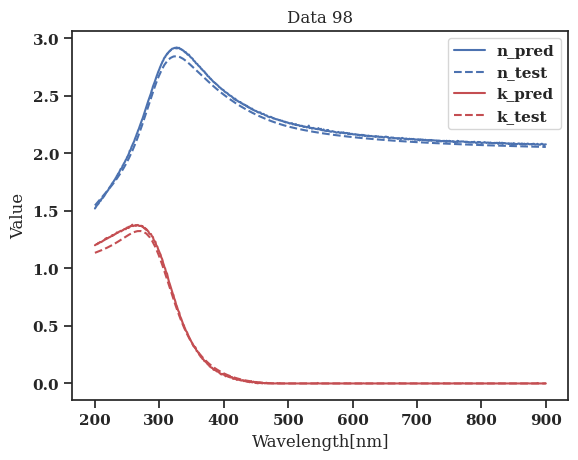

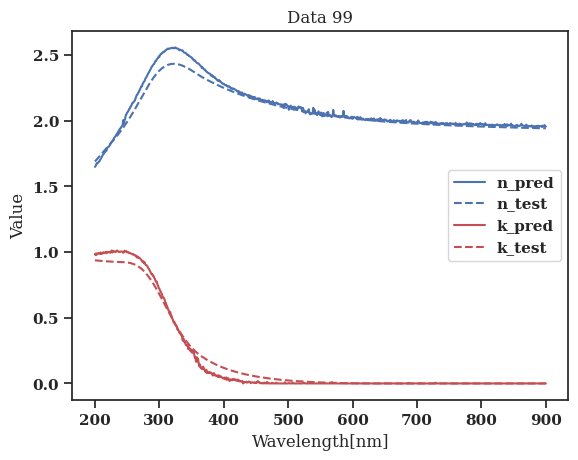

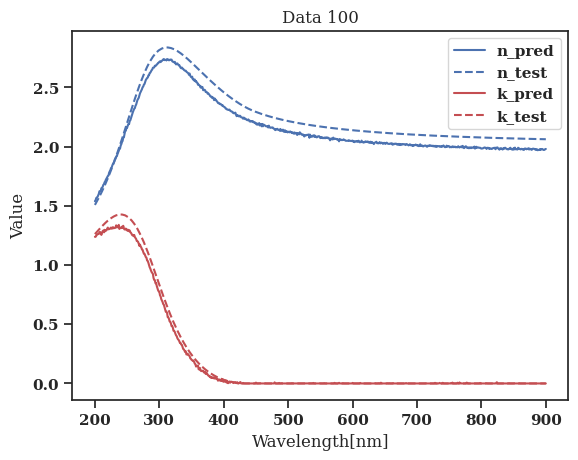

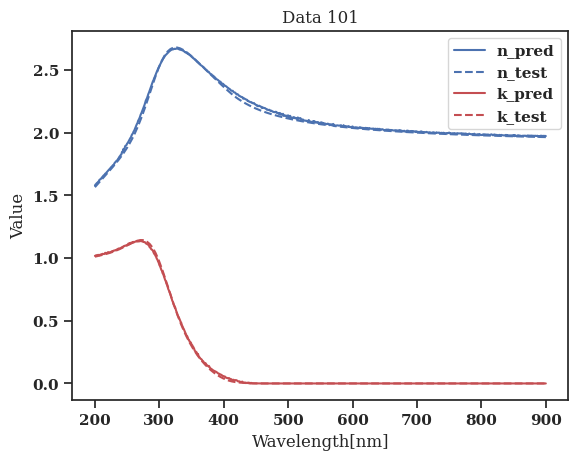

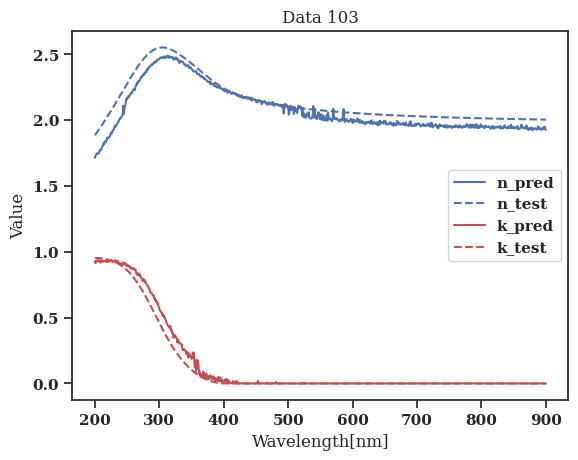

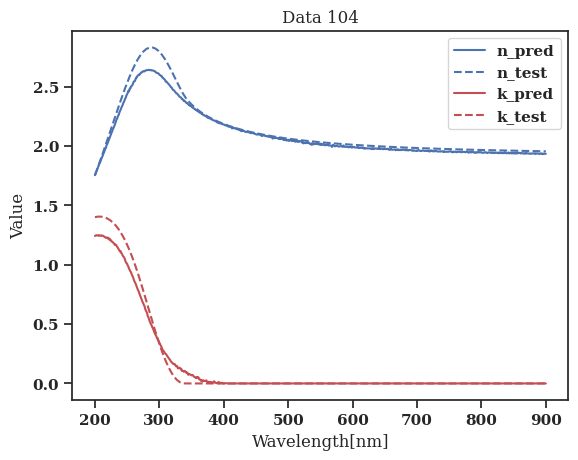

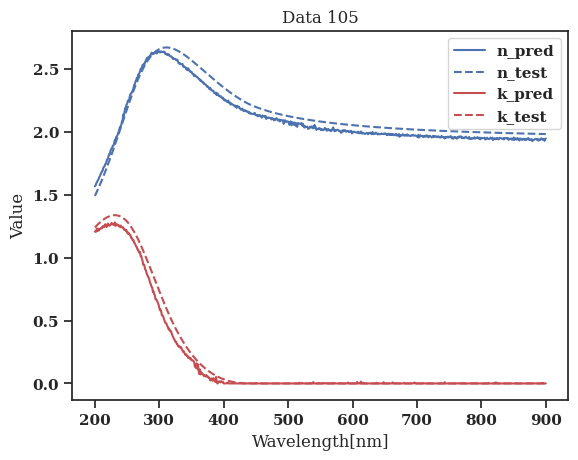

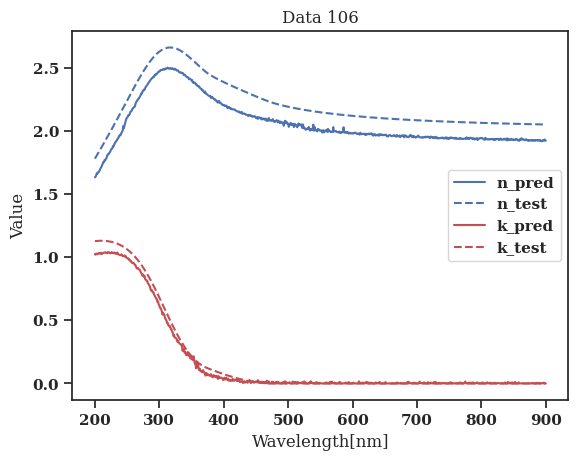

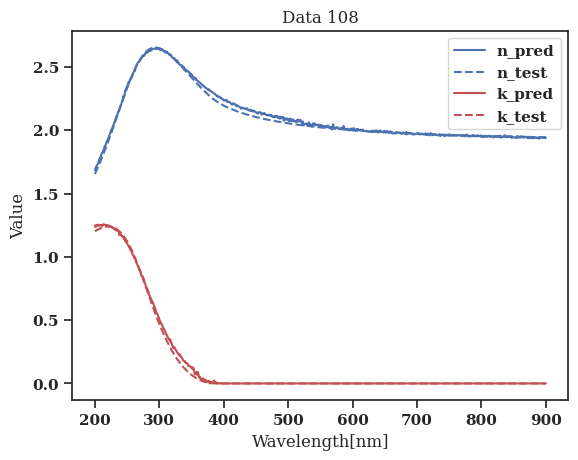

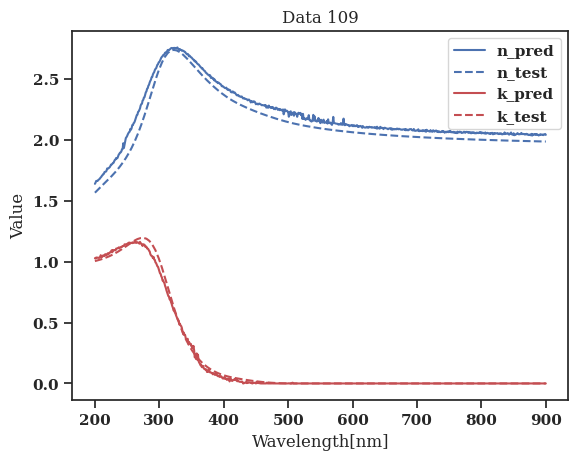

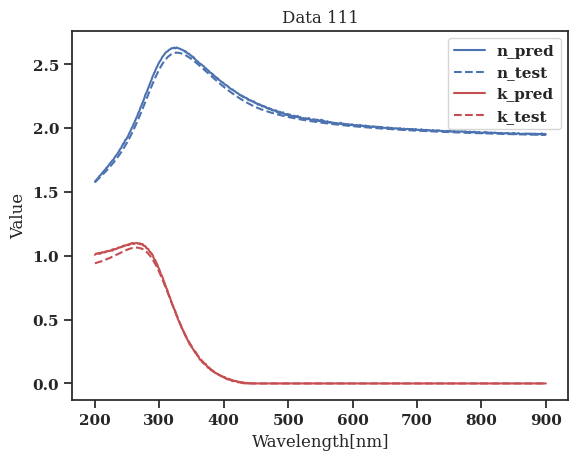

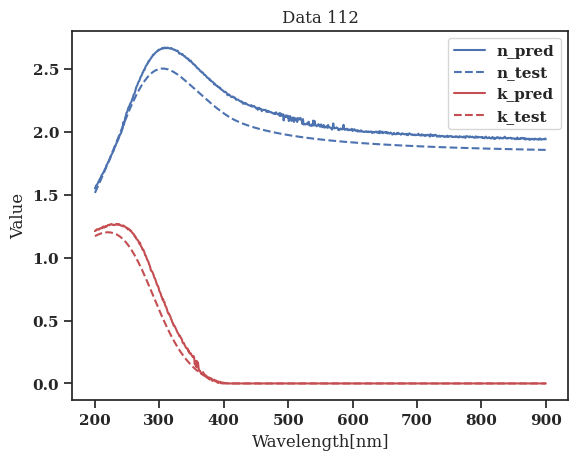

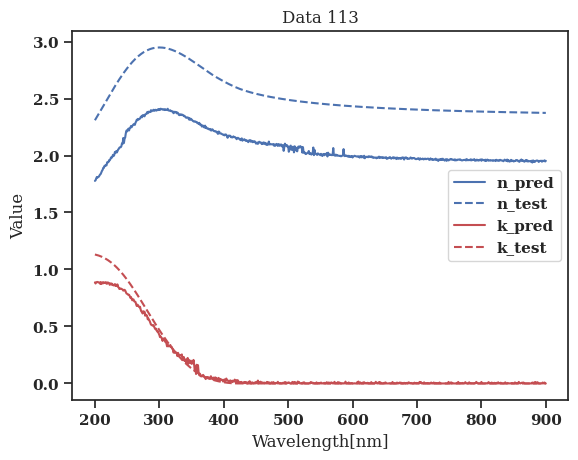

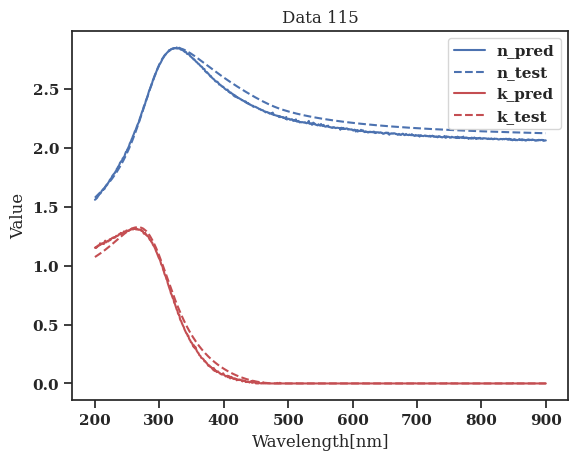

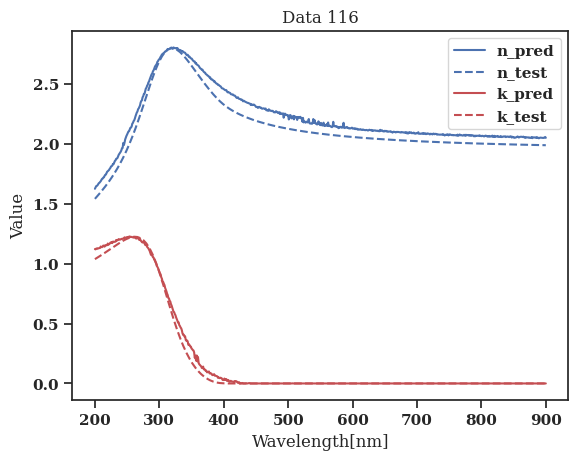

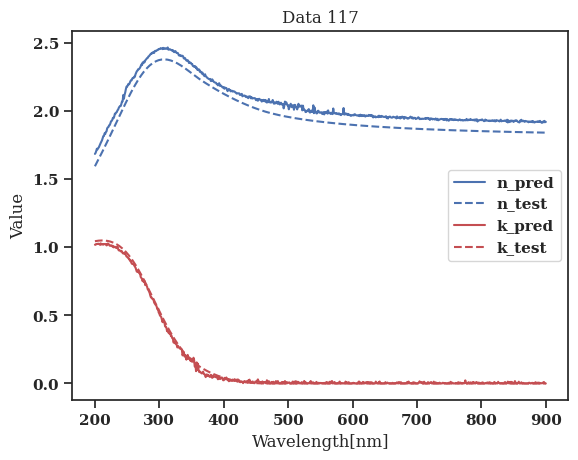

In [23]:
# 生成x坐标轴数据
wavelength = range(200, 901)

# 遍历121个数据，分别绘制四条曲线
for i in range(122):
    plt.figure()
    plt.plot(wavelength, n_pred[i], 'b-', label='n_pred')
    plt.plot(wavelength, n_test[i], 'b--', label='n_test')
    plt.plot(wavelength, k_pred[i], 'r-', label='k_pred')
    plt.plot(wavelength, k_test[i], 'r--', label='k_test')
    
    plt.xlabel('Wavelength[nm]')
    plt.ylabel('Value')
    plt.title('Data {}'.format(i+1))
    plt.legend()
    plt.show()